#Imports Required

In [ ]:
import os, cv2, keras
from google.colab.patches import cv2_imshow
from google.colab import files
import pandas as pd
import numpy as np
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

print("Imported!")

Imported!


#Upload and Unzip Training Images

In [ ]:
files.upload() #Select all_images.zip
!unzip /content/all_images.zip -d /content/

Saving all_images.zip to all_images (1).zip
Archive:  /content/all_images.zip
replace /content/all_images/e424afc725a3488265fff1a5b99cd3c2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


#Load and Preprocess Training Data

In [ ]:
file_names = []
directory_path = '/content/all_images'
all_files = os.listdir(directory_path)
suffixes = ('.jpg', '.jpeg')
for file in all_files:
    if file.endswith(suffixes):
        file_names.append(file)

sorted_file_names = sorted(file_names)

resized_images = []

desired_width = 256
desired_height = 256

for file_path in sorted_file_names:
    file_path = "/content/all_images/" + file_path
    image = cv2.imread(file_path)
    resized_image = cv2.resize(image, (desired_width, desired_height))
    resized_images.append(resized_image)

#Sanity Check with a Funny Picture

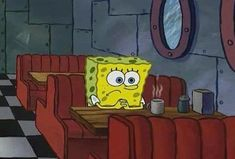

In [ ]:
image = cv2.imread("/content/all_images/" + sorted_file_names[100])
cv2_imshow(image)

#Load the Classification Data

In [ ]:
csv_filename = "/content/assigned_classes.csv"
df = pd.read_csv(csv_filename)
sorted_df = df.sort_values(by="img")
print(sorted_df)

                                                   img  Spongebob  Patrick
66                01452bf73ef61c24a7b95e925daf8a6a.jpg          0        1
553           0162195b583f4913a31690f7462527a5 (1).jpg          0        1
454               024b43099bc938b5eeebd5550225e8e4.jpg          1        0
267               02a5dcf8007a09bb2283db196631a691.jpg          1        0
34            03207ce4f437bc1f07c587477293ef5b (1).jpg          0        1
..                                                 ...        ...      ...
100  whimsical-editorial-vector-illustrations-spong...          1        0
435  yogyakarta-indonesia-9-july-2023-260nw-2328884...          0        1
584  yogyakarta-indonesia-9-july-2023-260nw-2328885...          1        0
537  yogyakarta-indonesia-9-july-2023-260nw-2328885...          1        0
668  yogyakarta-indonesia-9-july-2023-260nw-2328885...          1        0

[1030 rows x 3 columns]


#Create a DataFrame with the Class labels (For later use in creating a train/test split)

In [ ]:
classes_list = []

for index, row in sorted_df.iterrows():
    if row["Spongebob"] == 1:
        classes_list.append(0)
    else:
        classes_list.append(1)

In [ ]:
classes_df = pd.DataFrame(classes_list)

In [ ]:
arr = np.array(resized_images)
data_filepath = "/content/Data.npy"
np.save(data_filepath, arr)

In [ ]:
Data = np.load(data_filepath)

# The shape of the training data

In [ ]:
Data.shape

(1030, 256, 256, 3)

In [ ]:
classes_df.shape

(1030, 1)

#More Training Data Processing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Data/255., classes_df, test_size=0.1, random_state=0)

In [ ]:
y_train_cnn = utils.to_categorical(y_train)
y_test_cnn = utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

In [ ]:
X_train_cnn = X_train.reshape(X_train.shape[0], 256,256,3).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 256, 256,3).astype('float32')

#Images have been split into training and testing data

In [ ]:
X_train_cnn.shape

(927, 256, 256, 3)

In [ ]:
X_test_cnn.shape

(103, 256, 256, 3)

#Define the CNN model!
##Layers and activation functions can be found at [keras](https://keras.io/api/layers)
###Try playing around with the following settings in the models below:

*   Activation function: relu, sigmoid, linear
*   Remove or Add more layers
*   Change the dropout values (0.1-0.9)



In [ ]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(256,256,3), activation = 'relu'))
    model.add(Conv2D(32, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Flatten())


    model.add(Dropout(0.5))

    model.add(Dense(2, activation= 'softmax'))

    optimizer = keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

In [ ]:
def linear_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(256,256,3), activation = 'linear'))
    model.add(Conv2D(32, (3, 3), activation = 'linear'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation = 'linear'))
    model.add(Conv2D(64, (3, 3), activation = 'linear'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Flatten())


    model.add(Dropout(0.5))

    model.add(Dense(2, activation= 'softmax'))

    optimizer = keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

In [ ]:
def sigmoid_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(256,256,3), activation = 'sigmoid'))
    model.add(Conv2D(32, (3, 3), activation = 'sigmoid'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation = 'sigmoid'))
    model.add(Conv2D(64, (3, 3), activation = 'sigmoid'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Flatten())


    model.add(Dropout(0.5))

    model.add(Dense(2, activation= 'softmax'))

    optimizer = keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

#Create A Model Instance, Train, and Evaluate
## Try increasing the number of epochs or the validation split

In [ ]:
print("[INFO] creating model...")
model = cnn_model() #change model here by calling different function
# Fit the model
print("[INFO] training model...")
records = model.fit(X_train_cnn, y_train_cnn, validation_split=0.1, epochs=1, batch_size=16)
# Final evaluation of the model
print("[INFO] evaluating model...")
scores = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1])

#Save the model for later use or to have multiple trained models

In [ ]:
print("[INFO] saving model...")
model.save("my_model.keras") #change name if you want to save multiple models (will dissapear when runtime ends)

[INFO] saving model...


#Frontend

#Download necessary files for frontend

In [ ]:
#Upload webfolders.zip to collab and unzip its contents
from google.colab import files
files.upload() #Select web_folders.zip
!unzip /content/webfolders.zip -d /content/

#Download dependency for running frontend

In [ ]:
!pip install pyngrok
#Sign up for ngrok or login at https://dashboard.ngrok.com/login
#Using your iastate account through google or personal
#Get your Authtoken at https://dashboard.ngrok.com/auth

#Make flask app and run!

In [ ]:
from flask import Flask, render_template, request, redirect, url_for, send_from_directory
from pyngrok import ngrok, conf
import tensorflow as tf
import cv2, os, getpass
import numpy as np

app = Flask(__name__, template_folder="./templates")
UPLOAD_FOLDER = os.path.join(os.getcwd(), "uploads")
ALLOWED_EXTENSIONS = {"jpg", "png", "gif", "jpeg"}
port = "5000"

print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()

# Open a ngrok tunnel to the HTTP server
public_url = ngrok.connect(port).public_url
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"")

app.config["UPLOAD_FOLDER"] = UPLOAD_FOLDER
app.config["BASE_URL"] = public_url

model = tf.keras.models.load_model("./my_model.keras") #change file name to different model if desired

def recognize_character(image_path):
    # Load the pre-trained model
    # Load the input image
    input_image = cv2.imread(image_path)

    # dimensions for resizing the image to the CNN's input layer's specifications
    desired_width = 256
    desired_height = 256

    # Resize the input image
    resized_image = cv2.resize(input_image, (desired_width, desired_height))
    resized_image = np.expand_dims(resized_image, axis=0)

    # Perform image recognition
    prediction = model.predict(resized_image)
    class_labels = ["Spongebob", "Patrick"]

    # Get the predicted label
    predicted_label = class_labels[prediction.argmax()]

    return predicted_label


def allowed_file(filename):
    return "." in filename and filename.rsplit(".", 1)[1].lower() in ALLOWED_EXTENSIONS


@app.route("/", methods=["GET", "POST"])
def index():
    if request.method == "POST":
        # Check if a file is uploaded
        if "file" not in request.files:
            return redirect(
                request.url
            )  # used in the Flask framework to redirect the user's browser to the URL specified in the request.url variable

        file = request.files["file"]

        if file.filename == "":
            return redirect(request.url)

        if file and allowed_file(file.filename):
            # Save the uploaded file
            filename = os.path.join(app.config["UPLOAD_FOLDER"], file.filename)
            file.save(filename)

            # Perform image recognition here (not implemented in this example)

            # Redirect to the result page with the image filename
            return redirect(url_for("result_loader", filename=file.filename))

    return render_template("index.html")


@app.route("/result/<filename>")
def result(filename):
    # Perform image recognition and character detection here
    # You can pass the detected character as a variable to the template
    image_path = os.path.join(app.config["UPLOAD_FOLDER"], filename)
    detected_character = recognize_character(image_path)  # Call your recognition code
    return render_template(
        "result.html", filename=filename, detected_character=detected_character
    )


@app.route("/result_loader/<filename>")
def result_loader(filename):
    return render_template("result_loader.html", filename=filename)


@app.route("/uploads/<filename>")
def uploaded_file(filename):
    return send_from_directory(app.config["UPLOAD_FOLDER"], filename)

app.run()

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
